In [143]:
import pickle
import cv2
import numpy as np
import cv2
from skimage.metrics import structural_similarity
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import psycopg2
import urllib.parse as urlparse
import os
## fast writes
from sqlalchemy import event, create_engine
import psycopg2.extras
import psycopg2.errorcodes

def open_connection():
    connection = psycopg2.connect(
        database=os.environ['RACK_DATABASE'],
        user=os.environ['RACK_USERNAME'],
        password=os.environ['RACK_PASSWORD'],
        host=os.environ['RACK_HOST'],
        port=os.environ['RACK_PORT']
        )
    return connection

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def get_gray(faces, image, gray):
    image_gray = None
    for (x,y,w,h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        image_gray = gray[y:y+h, x:x+w]
    return image_gray

def get_single_face(gray):
    for i in range(10, 25):
        faces = haar_cascade_face.detectMultiScale(gray, 1.1, i)
        if len(faces) == 1:
            return faces, True
        elif len(faces) == 0:
            return [], False
    return [], False

In [78]:
victim_with_id = pd.read_sql_query("select * from victim_photo", open_connection())
victim_with_id

,id,url
0,35,http://www.pollyklaas.org/missing/kids/breitri...
1,36,http://www.pollyklaas.org/missing/kids/person-...
2,37,http://www.pollyklaas.org/missing/kids/oswaltc...
3,38,http://www.pollyklaas.org/missing/kids/images/...
4,39,http://www.pollyklaas.org/missing/kids/images/...
5,40,http://www.pollyklaas.org/missing/kids/navarro...
6,41,http://www.pollyklaas.org/missing/kids/images/...
7,42,http://www.pollyklaas.org/missing/kids/images/...
8,43,http://www.pollyklaas.org/missing/kids/dennard...
9,44,http://www.pollyklaas.org/missing/kids/images/...


Read Image
==

In [80]:
i = 1
url = victim_with_id.loc[i, 'url']
file_name = url.split('/')[-1].split('.')[0]
id_ = victim_with_id.loc[i, 'id']
path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)
## get image
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = haar_cascade_face.detectMultiScale(gray, 1.1, 2)
gray_1 = get_gray(faces, image, gray)

i = 11
url = victim_with_id.loc[i, 'url']
file_name = url.split('/')[-1].split('.')[0]
id_ = victim_with_id.loc[i, 'id']
path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)
## get image
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = haar_cascade_face.detectMultiScale(gray, 1.1, 2)
gray_2 = get_gray(faces, image, gray)

In [81]:
H, W = gray_1.shape
image_1_area = H*W

H, W = gray_2.shape
image_2_area = H*W

if image_1_area > image_2_area:
    gray_2 = cv2.resize(gray_2, gray_1.shape)
elif image_1_area < image_2_area:
    gray_1 = cv2.resize(gray_1, gray_2.shape)

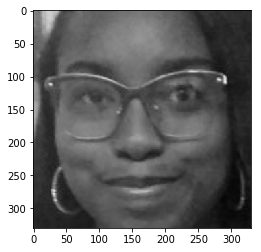

In [82]:
plt.imshow(convertToRGB(gray_1))

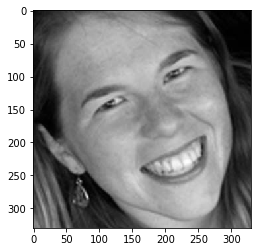

In [83]:
plt.imshow(convertToRGB(gray_2))

In [84]:
structural_similarity(gray_1, gray_2)

0.380025663360594

Compare Me To All
==

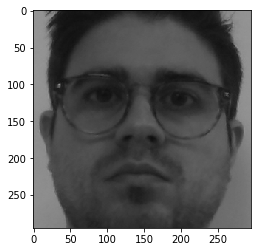

In [27]:
cap = cv2.VideoCapture(0)
ret, image_cap = cap.read()
gray = cv2.cvtColor(image_cap, cv2.COLOR_BGR2GRAY)
faces = haar_cascade_face.detectMultiScale(gray, 1.1, 2)
gray_cap = get_gray(faces, image_cap, gray)

H, W = gray_cap.shape
gray_cap_area = H*W

plt.imshow(convertToRGB(gray_cap))

In [3]:
victim_with_id = pd.read_sql_query("select * from victim_photo", open_connection())
for i in victim_with_id.index:
    url = victim_with_id.loc[i, 'url']
    file_name = url.split('/')[-1].split('.')[0]
    id_ = victim_with_id.loc[i, 'id']
    path = '../../data/victim/{}/{}.jpg'.format(id_, file_name)
    ## get image
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = haar_cascade_face.detectMultiScale(gray, 1.1, 2)
    if len(faces) > 0:
        gray_v = get_gray(faces, image, gray)

        ## prep for comparison
        gray_cap_ = gray_cap
        H, W = gray_v.shape
        image_area = H*W
        

        if gray_cap_area > image_area:
            gray_v = cv2.resize(gray_v, gray_cap_.shape)
        elif gray_cap_area < image_area:
            gray_cap_ = cv2.resize(gray_cap_, gray_v.shape)

        victim_with_id.loc[i, 'sim'] =  structural_similarity(gray_cap_, gray_v)

In [4]:
victim_with_id.sort_values('sim', ascending=False)

,id,url,sim
9,44,http://www.pollyklaas.org/missing/kids/images/...,0.538283
3,38,http://www.pollyklaas.org/missing/kids/images/...,0.526799
1,36,http://www.pollyklaas.org/missing/kids/person-...,0.477486
21,56,http://www.pollyklaas.org/missing/kids/images/...,0.438629
7,42,http://www.pollyklaas.org/missing/kids/images/...,0.427530
14,49,http://www.pollyklaas.org/missing/kids/images/...,0.421980
29,64,http://www.pollyklaas.org/missing/kids/images/...,0.403353
5,40,http://www.pollyklaas.org/missing/kids/navarro...,0.396981
8,43,http://www.pollyklaas.org/missing/kids/dennard...,0.391115
0,35,http://www.pollyklaas.org/missing/kids/breitri...,0.386604


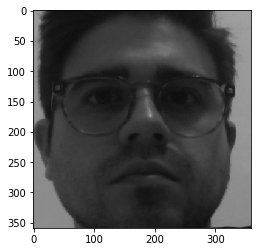

In [5]:
plt.imshow(convertToRGB(gray_cap))

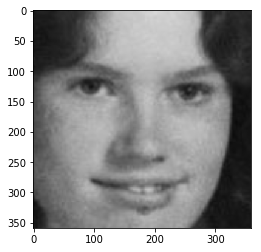

In [6]:
plt.imshow(convertToRGB(gray_v))

In [157]:
def compare_images(image_to_compare, directory, id_, return_image=False):
    ## format image to compare
    gray = cv2.cvtColor(image_to_compare, cv2.COLOR_BGR2GRAY)
    faces = haar_cascade_face.detectMultiScale(gray, 1.1, 2)
    gray_cap = get_gray(faces, image_to_compare, gray)
    H, W = gray_cap.shape
    gray_cap_area = H*W    
        
        
    ## get victim image
    sql_ = """
    SELECT url 
    FROM {}_photo
    WHERE id = {}
    """.format(directory, id_)
    url = pd.read_sql_query(sql_, open_connection()).loc[0, 'url']
    file_name = url.split('/')[-1].split('.')[0]
    path = '../../data/{}s/{}/{}.jpg'.format(directory, id_, file_name)
    path = '/Users/Alexanderhubbard/Downloads/test.jpg'
    image = cv2.imread(path)
    
    ## format image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces, found = get_single_face(gray)
    if found:
        gray_v = get_gray(faces, image, gray)

        ## prep for comparison
        H, W = gray_v.shape
        image_area = H*W
        

        if gray_cap_area > image_area:
            gray_v = cv2.resize(gray_v, gray_cap.shape)
        elif gray_cap_area < image_area:
            gray_cap = cv2.resize(gray_cap, gray_v.shape)
        
        if return_image == False:
            return structural_similarity(gray_cap, gray_v)
        else:
            return structural_similarity(gray_cap, gray_v), image
    if return_image == False:
        return None
    else:
        return None, None
        

0.4215829769834515


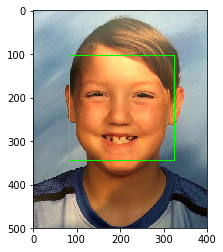

In [155]:
sim, victim_image = compare_images(image_cap, 'victim', 38, return_image=True)
print(sim)
plt.imshow(convertToRGB(victim_image))

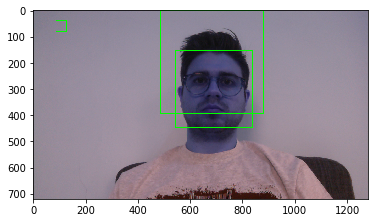

In [156]:
plt.imshow(image_cap)

In [160]:
cv2.cvtColor(tmp_frames, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [159]:
sim, victim_image = compare_images(tmp_frames, 'victim', 38, return_image=True)
sim

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


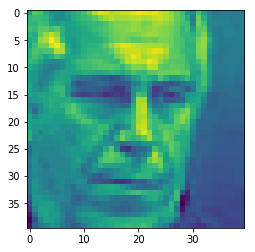

In [158]:
plt.imshow(tmp_frames)

Compare again
==

In [126]:
now = pd.datetime.now()
victim_with_id = pd.read_sql_query("select * from victim_photo", open_connection())
victim_with_id['sim'] = victim_with_id['id'].apply(lambda row: compare_images(image_cap, row))
# victim_with_id = victim_with_id.loc[victim_with_id['sim'].notnull()]
print(pd.datetime.now() - now)

0:00:15.530007


In [128]:
victim_with_id.sort_values('sim', ascending=False)

,id,url,sim
8,44,http://www.pollyklaas.org/missing/kids/images/...,0.537490
0,36,http://www.pollyklaas.org/missing/kids/person-...,0.479946
20,56,http://www.pollyklaas.org/missing/kids/images/...,0.436588
6,42,http://www.pollyklaas.org/missing/kids/images/...,0.423303
13,49,http://www.pollyklaas.org/missing/kids/images/...,0.410741
2,38,http://www.pollyklaas.org/missing/kids/images/...,0.402917
28,64,http://www.pollyklaas.org/missing/kids/images/...,0.401120
4,40,http://www.pollyklaas.org/missing/kids/navarro...,0.397446
30,35,http://www.pollyklaas.org/missing/kids/breitri...,0.394890
7,43,http://www.pollyklaas.org/missing/kids/dennard...,0.382608


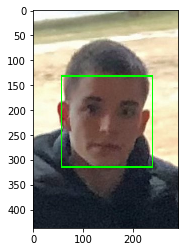

In [15]:
id_ = victim_with_id.sort_values('sim', ascending=False).index[0]
id_ = victim_with_id.loc[id_, 'id']

sim, victim_image = compare_images(image_cap, id_)
plt.imshow(convertToRGB(victim_image))

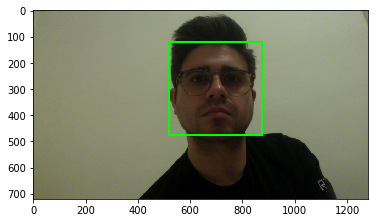

In [16]:
plt.imshow(convertToRGB(image_cap))

In [165]:
image_cap

array([[[127, 136, 135],
        [125, 135, 134],
        [106, 137, 134],
        ...,
        [128, 138, 133],
        [129, 139, 123],
        [133, 144, 127]],

       [[126, 134, 129],
        [126, 134, 129],
        [109, 136, 134],
        ...,
        [120, 136, 127],
        [132, 137, 123],
        [136, 142, 128]],

       [[127, 133, 128],
        [129, 134, 129],
        [113, 137, 130],
        ...,
        [116, 129, 123],
        [129, 126, 117],
        [131, 129, 120]],

       ...,

       [[ 62, 110, 119],
        [ 61, 109, 118],
        [ 63, 109, 116],
        ...,
        [ 84, 112, 111],
        [ 88, 112, 109],
        [ 90, 113, 111]],

       [[ 65, 108, 118],
        [ 65, 108, 118],
        [ 72, 109, 117],
        ...,
        [ 81, 111, 110],
        [ 90, 111, 111],
        [ 89, 110, 110]],

       [[ 67, 108, 118],
        [ 69, 110, 120],
        [ 80, 110, 118],
        ...,
        [ 74, 108, 110],
        [ 84, 111, 113],
        [ 84, 111, 113]]

Download form s3
==

In [ ]:
s3 = boto3.resource('s3', region_name='us-east-2')
bucket = s3.Bucket('sentinel-s2-l1c')
object = bucket.Object('tiles/10/S/DG/2015/12/7/0/B01.jp2')
tmp = tempfile.NamedTemporaryFile()

with open(tmp.name, 'wb') as f:
    object.download_fileobj(f)
    img=mpimg.imread(tmp.name)

In [193]:
cap = cv2.VideoCapture('/Users/Alexanderhubbard/Documents/projects/object-detection/yolo-coco/videos/car_chase_01.mp4')

In [22]:
video = '/Users/Alexanderhubbard/Documents/projects/object-detection/yolo-coco/videos/car_chase_01.mp4'

# Opens the Video file
cap= cv2.VideoCapture(video)
while not cap.isOpened():
    cap = cv2.VideoCapture("./out.mp4")
    cv2.waitKey(1000)
    print("Wait for the header")

Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header


Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header


Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header


Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header


Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header


Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header


Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header


Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header


Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header


Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header


Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header


Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header
Wait for the header


KeyboardInterrupt: 

In [24]:
cap.read()

(False, None)

In [29]:
pos_frame = cap.get(cv2.CV_CAP_PROP_POS_FRAMES)

AttributeError: module 'cv2.cv2' has no attribute 'CV_CAP_PROP_POS_FRAMES'

In [30]:
cv2.imshow('video', frame)

NameError: name 'frame' is not defined

In [31]:
cap.read()

(False, None)

In [191]:
video = '/Users/Alexanderhubbard/Documents/projects/object-detection/videos/airport.mp4'
video = '/Users/Alexanderhubbard/Downloads/jeffrey-epstein.mp4'
# Function to extract frames 
def FrameCapture(path): 

    # Path to video file 
    vidObj = cv2.VideoCapture(path) 

    # Used as counter variable 
    count = 0

    # checks whether frames were extracted 
    success = 1
    faces_from_video = 0

    while success: 
#         try:
        # vidObj object calls read 
        # function extract frames 
        success, image = vidObj.read() 

        # Saves the frames with frame-count 
        cv2.imwrite("video_tmp2/frame_tmp.jpg", image)

        image_ = cv2.imread('video_tmp2/frame_tmp.jpg')
        g = cv2.cvtColor(image_, cv2.COLOR_BGR2GRAY)
        faces = haar_cascade_face.detectMultiScale(g, 1.1, 10)
        gray_cap = get_gray(faces, image_, g)
        try:
            if len(gray_cap) > 0:
                print('found - frame{}'.format(count))
                faces_from_video += 1
                cv2.imwrite("video_tmp/frame%d.jpg" % faces_from_video, image_) 
                return gray_cap
        except:
            pass

        count += 1

#         except:
#             return faces_from_video
#     return faces_from_video

In [192]:
tmp_frames = FrameCapture(video)

found - frame33


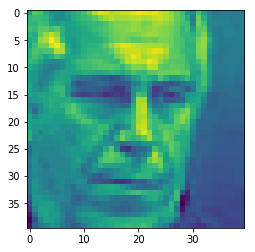

In [193]:
plt.imshow(tmp_frames)

In [187]:
pd.read_sql_query("select * from suspicious_activity_reports where id = 9;", open_connection())

,id,suspicion_type,date_observed,time_observed,room_number,room_registered_name,gender,age_observed,ethnicity,hair_color,...,license_number,license_state,why_vehicle_suspicious,anything_else,filename,bucket,prefix,url,race,location_observed
0,9,criminal,today,1:00pm,None,None,male,None,None,None,...,None,None,None,None,jeffrey-epstein.mp4,racksaruploads,9,https://racksaruploads.s3.amazonaws.com/9/jeff...,None,None


In [146]:
# import pickle
# now = pd.datetime.now()
# tmp = pd.read_sql_query("select * from perpetrator_photo", open_connection())
# tmp['face_vector'] = tmp['face_vector'].apply(lambda row: pickle.loads(eval(row)))
# tmp = tmp.loc[tmp['face_vector'].notnull()]
# tmp['face_vector'].apply(lambda row: compare_images(gray_cap, row, return_image=False))
# print(pd.datetime.now() - now)

In [151]:
tmp_frames

array([[117, 152, 148, ...,  90,  91,  91],
       [137, 141, 140, ...,  91,  90,  93],
       [137, 136, 144, ...,  93,  91,  93],
       ...,
       [ 26,  80, 119, ...,  56,  55,  54],
       [ 13,  62, 101, ...,  53,  53,  53],
       [ 24,  73,  89, ...,  50,  52,  54]], dtype=uint8)

In [197]:
gray = cv2.cvtColor(tmp_frames, cv2.COLOR_BGR2GRAY)
faces = haar_cascade_face.detectMultiScale(gray, 1.1, 2)
gray_cap = get_gray(faces, tmp_frames, gray)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [195]:
compare_images(tmp_frames, 'perpetrator', 1)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [208]:
path = '/Users/Alexanderhubbard/Downloads/test.jpg'
image = cv2.imread(path)

## format image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces, found = get_single_face(gray)

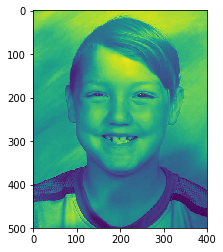

In [209]:
faces = haar_cascade_face.detectMultiScale(gray, 1.1, 8)
plt.imshow(gray)

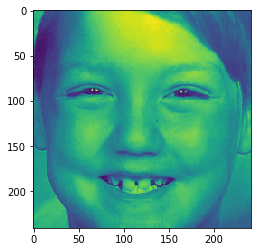

In [210]:
plt.imshow(get_gray(faces, image, gray))

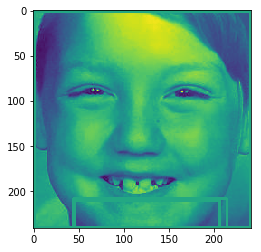

In [215]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = haar_cascade_face.detectMultiScale(gray, 1.1, 20)
gray_cap = get_gray(faces, image, gray)
plt.imshow(gray_cap)

In [216]:
compare_images

<function __main__.compare_images(image_to_compare, directory, id_, return_image=False)>

In [217]:
compare_images()

TypeError: compare_images() missing 3 required positional arguments: 'image_to_compare', 'directory', and 'id_'

In [218]:
sim, image_returned = compare_images(image, 'victim', 38, return_image=True)
print(sim)

0.884819168401895


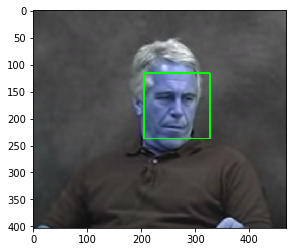

In [205]:
plt.imshow(image_returned)

In [ ]:
def get_single_face(gray):
    for i in range(10, 25):
        faces = haar_cascade_face.detectMultiScale(gray, 1.1, i)
        if len(faces) == 1:
            return faces, True
        elif len(faces) == 0:
            return [], False
    return [], False

In [82]:
# url = pd.read_sql_query(sql_, open_connection()).loc[0, 'url']
# file_name = url.split('/')[-1].split('.')[0]
path = '../../data/{}s/{}/{}.jpg'.format('perpetrator', 1, 'NINTCHDBPICT000141454388-e1562596411460')
path = '/Users/Alexanderhubbard/Downloads/test.jpg'
image = cv2.imread(path)

## format image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [83]:
gray

array([[67, 74, 78, ..., 16, 16, 16],
       [67, 74, 78, ..., 16, 16, 16],
       [67, 74, 78, ..., 16, 16, 16],
       ...,
       [69, 78, 84, ..., 17, 17, 17],
       [69, 78, 84, ..., 17, 17, 17],
       [69, 78, 84, ..., 17, 17, 17]], dtype=uint8)

In [84]:
haar_cascade_face.detectMultiScale(gray, 1.1, 25)

array([[286, 116, 338, 338]], dtype=int32)

In [65]:
image

In [25]:
g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = haar_cascade_face.detectMultiScale(g, 1.1, 2)
gray_cap = get_gray(faces, image_cap, gray)

NameError: name 'image_cap' is not defined

In [158]:
tmp_frames.shape[0]

720

In [176]:
for i in range(tmp_frames.shape[0]):
    image = tmp_frames[i].astype('uint8')
    g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = haar_cascade_face.detectMultiScale(g, 1.1, 2)
    gray_cap = get_gray(faces, image_cap, gray)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


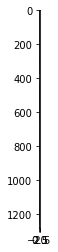

In [178]:
plt.imshow(image)

In [174]:
image

array([[124, 143, 168],
       [122, 141, 166],
       [122, 141, 166],
       ...,
       [ 48,  45,  52],
       [ 48,  45,  52],
       [ 48,  45,  52]], dtype=uint8)

In [164]:
image[0]

array([161, 168, 169], dtype=uint8)

In [134]:
def get_gray(faces, image, gray):
    image_gray = None
    for (x,y,w,h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        image_gray = gray[y:y+h, x:x+w]
    return image_gray

In [135]:
g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = haar_cascade_face.detectMultiScale(g, 1.1, 2)
gray_cap = get_gray(faces, image_cap, gray)
gray_cap

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = haar_cascade_face.detectMultiScale(gray, 1.1, 2)
gray_cap = get_gray(faces, image_cap, gray)

In [63]:
FrameCapture(video)

In [7]:
path = 'video_tmp/frame0.jpg'
image = cv2.imread(path)

## format image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
face_test, found_test = get_single_face(gray)
found_test

True

In [8]:
gray

array([[168, 168, 168, ..., 139, 138, 127],
       [165, 165, 165, ..., 136, 129, 124],
       [160, 160, 160, ..., 122, 115, 118],
       ...,
       [150, 149, 148, ...,  50,  48,  47],
       [148, 148, 147, ...,  49,  47,  46],
       [147, 147, 146, ...,  47,  47,  47]], dtype=uint8)

In [9]:
get_single_face(gray)

(array([[669, 622,  87,  87]], dtype=int32), True)

In [10]:
face_test

array([[669, 622,  87,  87]], dtype=int32)

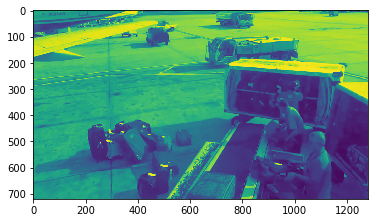

In [11]:
plt.imshow(gray)

In [103]:
faces, found = get_single_face(gray)

In [104]:
if found:
    gray_v = get_gray(faces, image, gray)

    ## prep for comparison
    H, W = gray_v.shape
    image_area = H*W


    if gray_cap_area > image_area:
        gray_v = cv2.resize(gray_v, gray_cap.shape)
    elif gray_cap_area < image_area:
        gray_cap = cv2.resize(gray_cap, gray_v.shape)

#     structural_similarity(gray_cap, gray_v), image

In [105]:
image

array([[[215, 204, 212],
        [215, 204, 212],
        [215, 204, 212],
        ...,
        [214, 206, 213],
        [214, 206, 213],
        [214, 206, 213]],

       [[215, 204, 212],
        [215, 204, 212],
        [215, 204, 212],
        ...,
        [214, 206, 213],
        [214, 206, 213],
        [214, 206, 213]],

       [[215, 204, 212],
        [215, 204, 212],
        [215, 204, 212],
        ...,
        [214, 206, 213],
        [214, 206, 213],
        [214, 206, 213]],

       ...,

       [[166, 163, 179],
        [166, 163, 179],
        [164, 163, 179],
        ...,
        [148, 144, 163],
        [148, 144, 163],
        [148, 144, 163]],

       [[155, 152, 168],
        [155, 152, 168],
        [154, 151, 167],
        ...,
        [148, 144, 163],
        [148, 144, 163],
        [148, 144, 163]],

       [[143, 140, 156],
        [143, 140, 156],
        [142, 139, 155],
        ...,
        [148, 144, 163],
        [148, 144, 163],
        [148, 144, 163]]

In [106]:
structural_similarity(gray_cap, gray_v)

0.3633089268007037

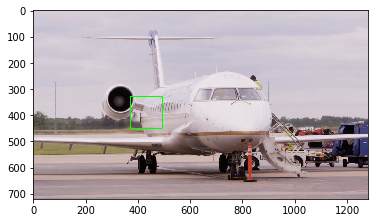

In [107]:
plt.imshow(convertToRGB(image))